In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# Importing the dataset
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

In [ ]:
# Turn the X and y values to DataFrames
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [18]:
X.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [5]:
X.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y.columns = ['Outcome']

In [14]:
y.isna().sum()

Outcome    0
dtype: int64

In [15]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

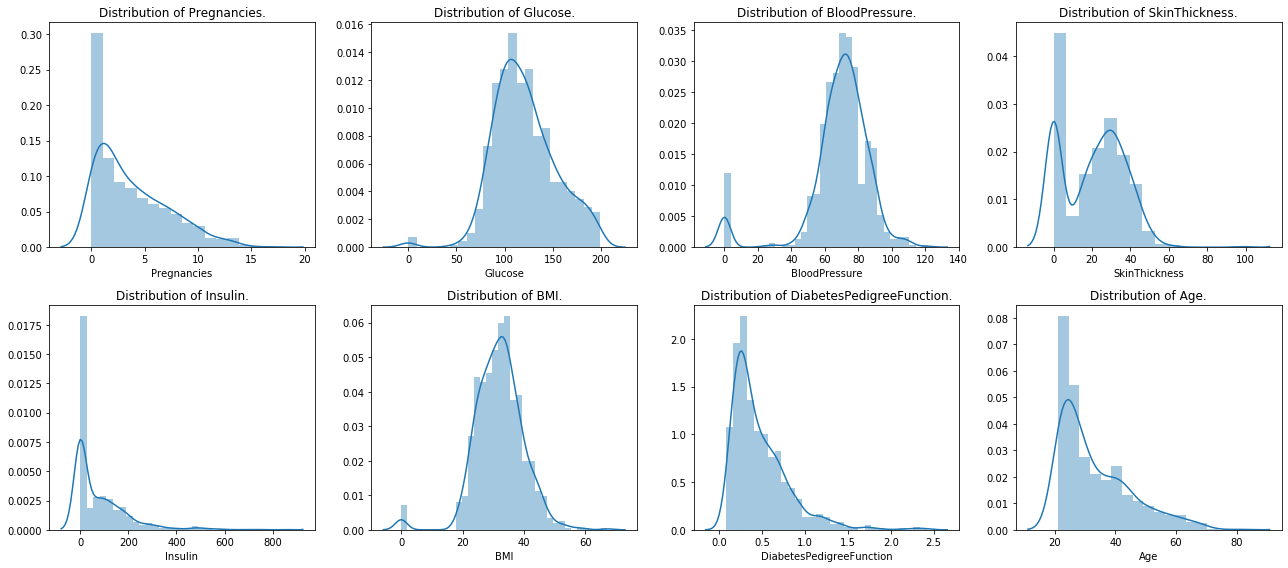

In [12]:
# Exporing the Data
plt.figure(figsize=(18, 8))

for i, column in enumerate(X.columns):
    plt.subplot(2, 4, i+1)
    sns.distplot(X[column])
    plt.title(f"Distribution of {column}.")

plt.tight_layout()
plt.show()

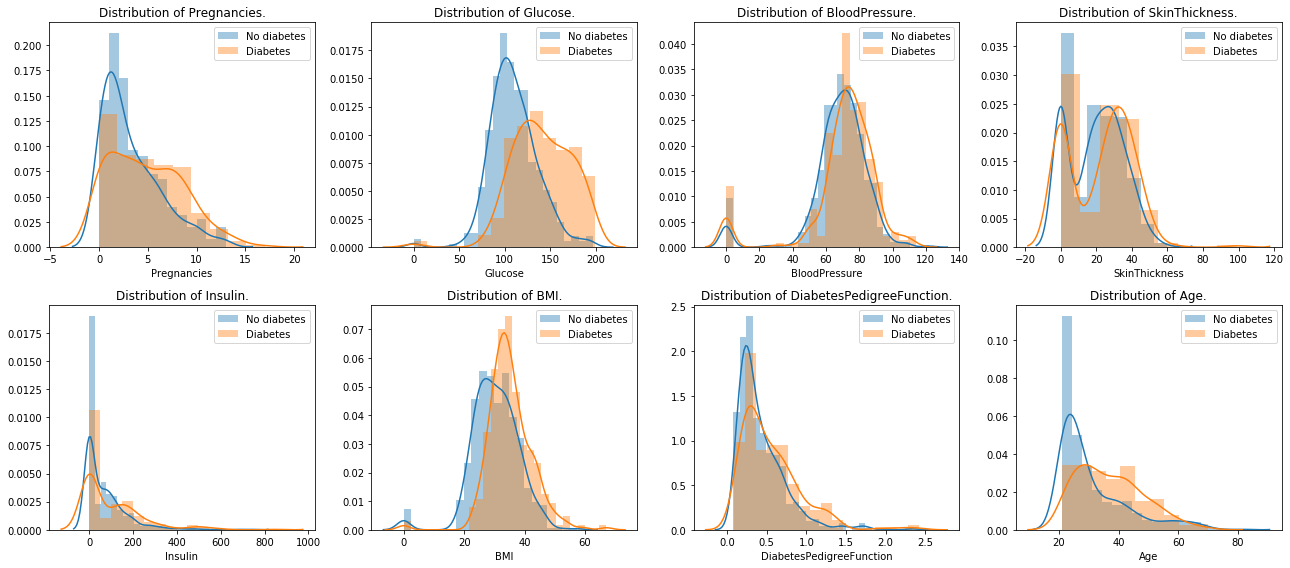

In [17]:
# Exporing the Data
plt.figure(figsize=(18, 8))

for i, column in enumerate(X.columns):
    plt.subplot(2, 4, i+1)
    sns.distplot(X[y['Outcome'] == 0][column], label="No diabetes")
    sns.distplot(X[y['Outcome'] == 1][column], label="Diabetes")
    plt.legend()
    plt.title(f"Distribution of {column}.")

plt.tight_layout()
plt.show()

We do several splits of the data between train and test set. The test size varies between 10% of the dataset and 90% of the dataset, in increments of 5% (first trying a split with a test size of 0.10, then of 0.15, then of 0.20, then ..., then of 0.85, then of 0.90).

Then we fit a KNN on each split of the data. we plot the evolution of the accuracy score, ROC AUC score and F1 score of the model on both train and test sets depending on the proportion of test data in each split.